# Detection Algorithm Results
Read and analyze the results from running the detection algorithm on all APF data, which has already been deblazed, normalized, and velocity shifted by Anna Zuckerman using specmatch-emp.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os, glob #glob.glob(DIR_NAME + '/*fits')
from astropy.io import fits

## Read in Reduced Data from Anna Zuckerman's repo
Read in all the spectra that was fed into the detection algorithm.

In [10]:
directory = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDR_corrected_wl_scale'

# every file in Anna's NDR_corrected_wl_scale folder
list_of_files = []
for filename in os.listdir(directory):
    if filename.endswith(".fits"): 
        file_path = os.path.join(directory, filename)
        list_of_files = np.append(list_of_files, file_path)

## Look at total detections tables
The spectra were divided into six bins to speed up the runtime of the detection algorithm. Combine all the individual tables into one table with all the results.

In [11]:
dir = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/MyStuff/LaserDetectionResults/SNRBinningResults/'
results1000 = pd.read_csv(dir + 'LaserDetectionResults1/all_results.csv', index_col = 'Index')
results2000 = pd.read_csv(dir + 'LaserDetectionResults2/all_results.csv', index_col = 'Index')
results3000 = pd.read_csv(dir + 'LaserDetectionResults3/all_results.csv', index_col = 'Index')
results4000 = pd.read_csv(dir + 'LaserDetectionResults4/all_results.csv', index_col = 'Index')
results5000 = pd.read_csv(dir + 'LaserDetectionResults5/all_results.csv', index_col = 'Index')
results6000 = pd.read_csv(dir + 'LaserDetectionResults6/all_results.csv', index_col = 'Index')

In [12]:
total_results = results1000.append([results2000, results3000, results4000, results5000, results6000])

In [13]:
total_results

,Unnamed: 0,Star,# Above Threshold,# Gaussian Shaped,# Wider than PSF
Index,,,,,
0,0,HIP12444,62,57,57
1,1,HIP19855,12,10,7
2,2,HIP12444,3,2,2
3,3,HIP12444,2,2,2
4,4,HIP42172,3,3,2
...,...,...,...,...,...
5863,863,HD172167,95,74,72
5864,864,Vega,7,7,6
5865,865,HD187642,98,85,85


## Add SNR data to table
Use SNR.ipynb to calculate the S/N ratios for all the spectra.

In [14]:
# read or create an array containing the SNRs of all the targets
SNR = np.load('SNR.npy')

In [19]:
# Select SNR values corresponding to the targets we ran the algorithm on.
# This step is only necessary if we omitted certain targets from the list.
indicies = total_results.index
actual_SNR = []
for i in indicies:
    s = SNR[i]
    actual_SNR = np.append(actual_SNR, s)

In [20]:
total_results['SNR'] = actual_SNR

In [21]:
# Save results
# total_results.to_csv('/home/zoek/code/APF-BL-DAP/Zoe/LaserDetectionResults.csv')

## Create a histogram of all the detections across all the spectra

In [22]:
num_detections = total_results['# Wider than PSF']

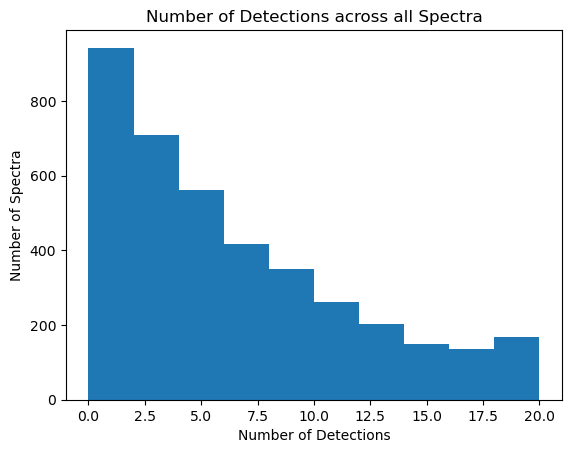

In [23]:
# plt.rcParams["figure.figsize"] = (18,12)
# plt.rcParams.update({'font.size': 50})
plt.hist(num_detections.tolist(), range=[0, 20])
plt.xlabel('Number of Detections')
plt.ylabel('Number of Spectra')
plt.title('Number of Detections across all Spectra')
plt.show()

In [24]:
# total number of detections
sum(num_detections)

249066

## Create a histogram of all the detections across all unique stars

In [25]:
aggregation_functions = {'# Wider than PSF': 'median'}
total_results_by_star = total_results.groupby(total_results['Star']).aggregate(aggregation_functions)

In [26]:
stars = total_results_by_star.index.to_numpy()
print(len(stars))

852


In [27]:
print('there are ' + str(total_results_by_star.shape[0]) + ' unique stars')

there are 852 unique stars


In [28]:
num_detections_by_star = total_results_by_star['# Wider than PSF']

In [29]:
max_num_detections = max(num_detections_by_star)
print('max # of detections: ' + str(max_num_detections))

max # of detections: 414.0


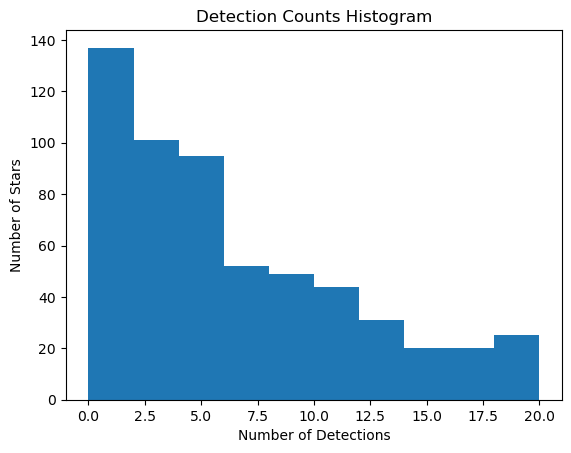

In [30]:
# plt.rcParams["figure.figsize"] = (10,5)
# plt.rcParams.update({'font.size': 20})
plt.hist(num_detections_by_star, range=[0, 20])
plt.xlabel('Number of Detections')
plt.ylabel('Number of Stars')
plt.title('Detection Counts Histogram')
plt.show()

## Find percentage of stars that have a certain # of detections

In [31]:
num_stars = total_results_by_star.shape[0]

In [32]:
zero_detections = total_results_by_star[total_results_by_star['# Wider than PSF'] < 0.5]
num_zero_detections = zero_detections.shape[0]

In [33]:
print(str(num_zero_detections * 100 / num_stars)  + '% of the stars have 0 detections' + ' (' + str(num_zero_detections) + ' stars)')

4.107981220657277% of the stars have 0 detections (35 stars)


In [34]:
less_than_10_detections = total_results_by_star[total_results_by_star['# Wider than PSF'] < 10]
num_less_than_10_detections = less_than_10_detections.shape[0]

In [35]:
print(str(num_less_than_10_detections * 100 / num_stars)  + '% of the stars have under 10 detections' + ' (' + str(num_less_than_10_detections) + ' stars)')

50.93896713615023% of the stars have under 10 detections (434 stars)


In [36]:
test = total_results[total_results[['# Wider than PSF']] == 0]
test.shape

(5868, 6)

## Observe the relationship between SNR and number of detections

In [37]:
num_detections = total_results['# Wider than PSF'].to_numpy()
SNR = total_results['SNR'].to_numpy()

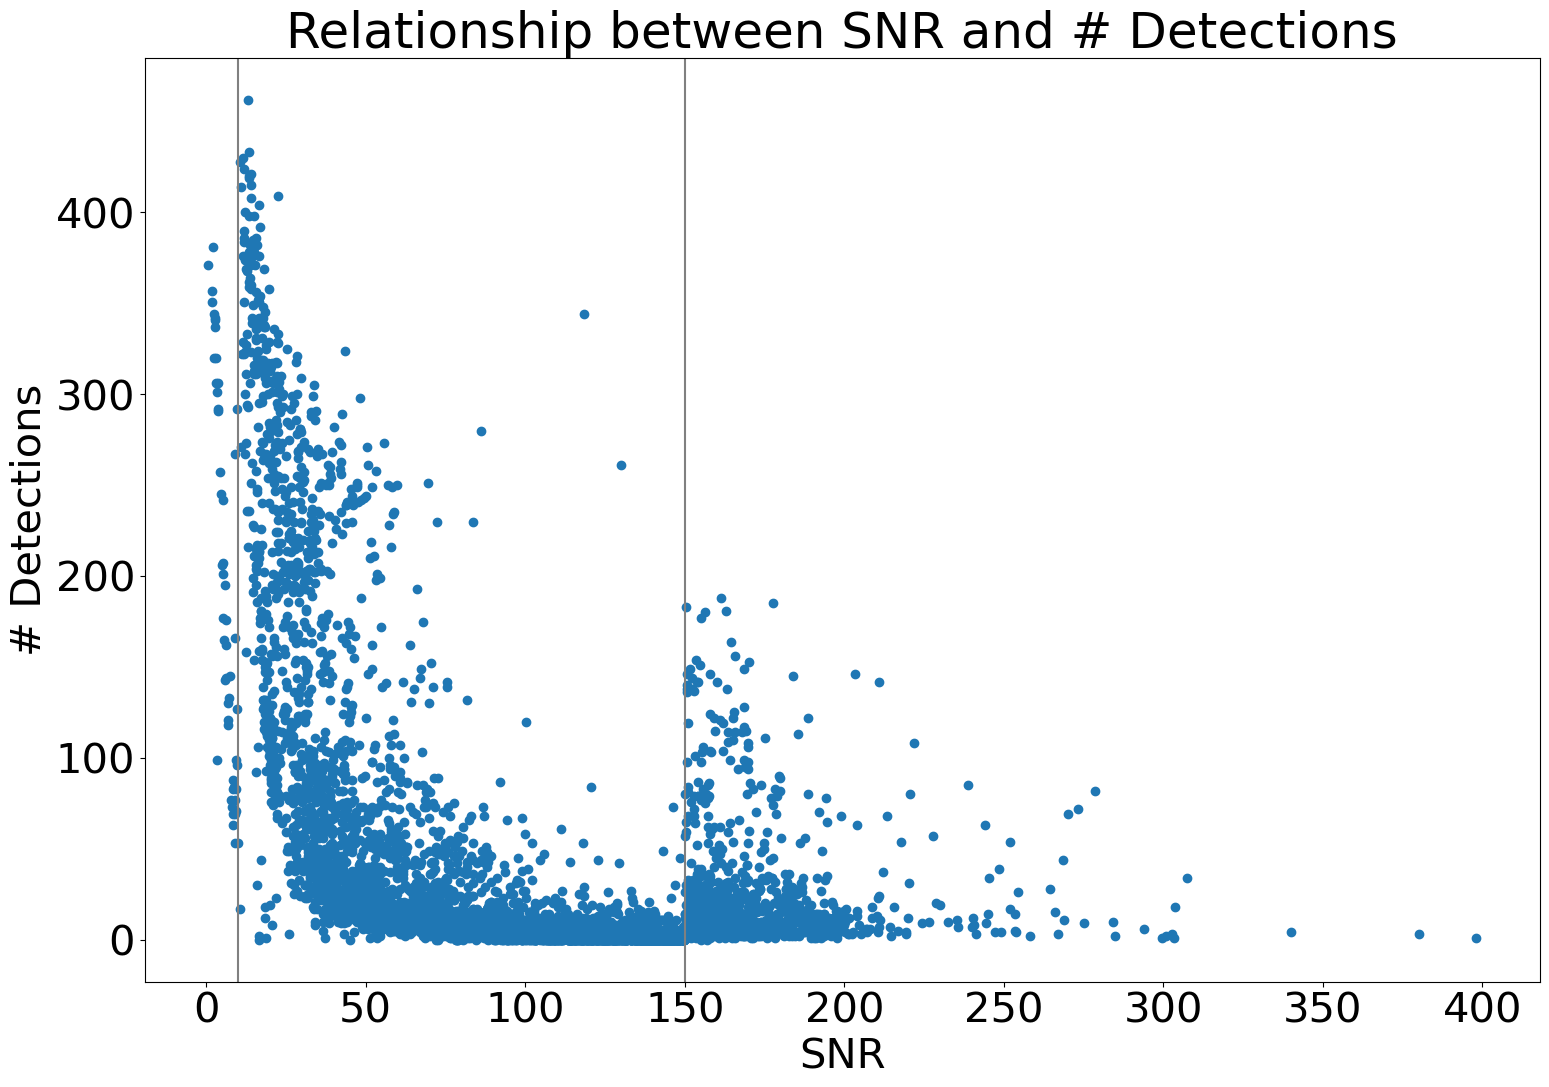

In [81]:
plt.rcParams["figure.figsize"] = (18,12)
plt.rcParams.update({'font.size': 30})
plt.scatter(SNR, num_detections)  # S/N 225 and above, 
plt.axvline(x=10, c='gray')
plt.axvline(x=150, c='gray')

plt.xlabel('SNR')
plt.ylabel('# Detections')
plt.title('Relationship between SNR and # Detections')
plt.show()

In [400]:
all_s = []
for i in np.arange(len(SNR)):
    s = SNR[i]
    n = num_detections.tolist()[i]
    for j in np.arange(n):
        all_s = np.append(all_s, s)

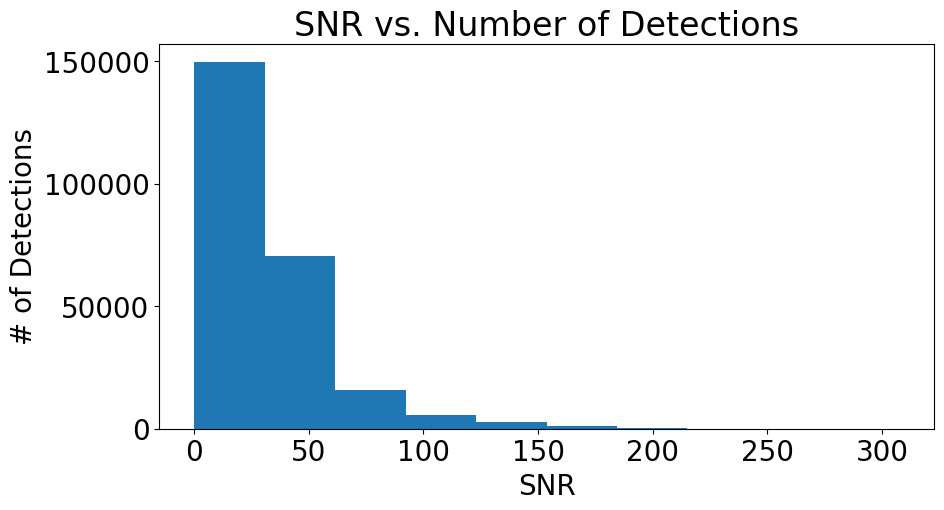

In [411]:
plt.hist(all_s)
plt.xlabel('SNR')
plt.ylabel('# of Detections')
plt.title('SNR vs. Number of Detections')
plt.show()

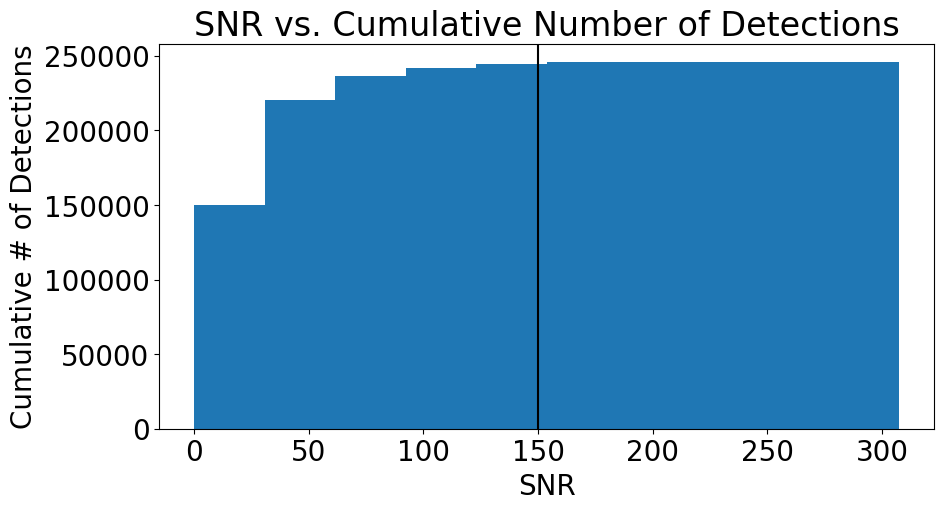

In [416]:
fig, ax = plt.subplots()

# plot the cumulative histogram
ax.hist(all_s, cumulative=True)
plt.axvline(x=150, color = 'black')
plt.xlabel('SNR')
plt.ylabel('Cumulative # of Detections')
plt.title('SNR vs. Cumulative Number of Detections')
plt.show()

## IGNORE BELOW

In [422]:
max_detections = total_results[total_results.SNR > 150]
max_detections
# max_detections.sort_values(by=['ndetections'], ascending=True)

,star,ndetections,SNR
index,,,
0,HIP12444,0,150.149579
1,HIP19855,2,162.887229
20,HIP77622,0,150.872526
23,HIP14576,0,161.751619
24,HIP21421,12,210.950923
...,...,...,...
5858,HD28355,0,181.209878
5859,HD28355,0,176.311487
5863,HD172167,1,273.203292


In [421]:
high_SNR = total_results[total_results.index == 415]
high_SNR.sort_values(by=['SNR'], ascending=False)

,star,ndetections,SNR
index,,,
415,HIP91262,0,398.131569


In [268]:
exposure_times = []

for file in list_of_files:
    
    file = fits.open(file)
    header = file[0].header
    exposure_time = header['EXPTIME']
    exposure_times = np.append(exposure_times, exposure_time)

#     print('File path: ' + APF_flux_path)
#     print('Star: ' + star)
#     print(exposure_time)
    
#     plt.figure()
#     plt.plot(wl, flux)
#     plt.ylim(0, 1.5)
#     plt.xlim(5880, 5920)
#     plt.show()
    
    # 14, 21, 24, 26, 27
    # 20, 28
    # weird 38



#     spect = flux

In [269]:
print(len(exposure_times))

5868


In [270]:
new1 = np.delete(exposure_times, 1762)

In [271]:
new2 = np.delete(new1, 1760)

In [272]:
final_exposure_times = new2.tolist()

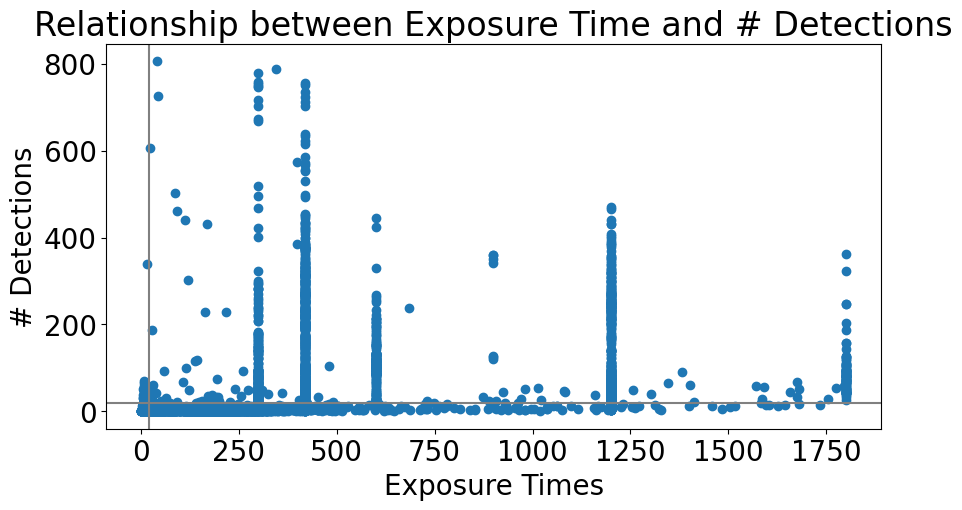

In [323]:
plt.scatter(final_exposure_times, num_detections)
plt.axvline(x=20, c='gray')
plt.axhline(y=20, c='gray')
# plt.ylim(1199, 1201)
plt.xlabel('Exposure Times')
plt.ylabel('# Detections')
plt.title('Relationship between Exposure Time and # Detections')
plt.show()